In [71]:
import numpy as np
import re
from numpy import zeros, dot, savetxt
from numpy.linalg import norm

Скачайте файл с предложениями (sentences.txt).

In [21]:
my_file = open("sentences.txt", "r")

Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().

In [22]:

a = my_file.readlines()
aa = []
for line in a:
    line = line.lower()
    aa.append(line)
    
aa

['in comparison to dogs, cats have not undergone major changes during the domestication process.\n',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.\n',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.\n',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.\n',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.\n',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.\n',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).\n',
 'however, if the output is piped or redirected, cat is unnecessary.\n',
 'cat with one named file is safer whe

Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [32]:
allw = []
allwo = []
for line in aa:
    words = re.split('[^a-z]',line)
    ww = []
    
    for i in words:
        if len(i)>0:
            ww.append(i)
            allwo.append(i)
    allw.append(ww)
    
allw


[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [60]:
keys = []
values = []
words = {}
lines = len(allw)
lcount, wcount = 0, 0
for s in allw:
    for token in s:
        # If a token is not presented in the dictionary yet then we add it.
        # The value of the 'occurrences' entry is a list object where every item represents
        # a specific line in the text file. The first item represents the first line, the second item
        # represents the sencond line etc. 
        if token not in words:
            words[token] = {
                "index": wcount,
                "occurrences": [0] * lines
            }
            wcount += 1
        # If we find the same token in the same list of tokens (in the same line)
        # then we just ignore it.
        elif words[token]["occurrences"][lcount] != 0:
            continue
                
        # Here we register how many times a token occured in a list of tokens (in a line)    
        words[token]["occurrences"][lcount] = s.count(token)    
    lcount += 1
    
words


{'a': {'index': 33,
  'occurrences': [0,
   0,
   3,
   0,
   1,
   0,
   0,
   0,
   1,
   2,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   1]},
 'according': {'index': 167,
  'occurrences': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0]},
 'adjacent': {'index': 114,
  'occurrences': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0]},
 'allow': {'index': 185,
  'occurrences': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0]},
 'allows': {'index': 196,
  'occurrences': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0]},
 'also': {'index': 24,
  'occurrences': [0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,

In [66]:
arr = np.zeros((lines, len(words)))
for word in words:
    i, j = 0, words[word]["index"]
    for occ in words[word]["occurrences"]:
        arr[i, j] = occ
        i += 1
        
arr.shape

(22, 254)

In [74]:
dist = [] 
u = arr[0,] 
for i in range(0, lines):
    v = arr[i,]
    dist.append({"index": i, "distance": 1.0 - (dot(u, v) / (norm(u) * norm(v)))})
    
dist

[{'distance': 0.0, 'index': 0},
 {'distance': 0.9527544408738466, 'index': 1},
 {'distance': 0.8644738145642124, 'index': 2},
 {'distance': 0.8951715163278082, 'index': 3},
 {'distance': 0.7770887149698589, 'index': 4},
 {'distance': 0.9402385695332803, 'index': 5},
 {'distance': 0.7327387580875756, 'index': 6},
 {'distance': 0.9258750683338899, 'index': 7},
 {'distance': 0.884272487528431, 'index': 8},
 {'distance': 0.9055088817476932, 'index': 9},
 {'distance': 0.8328165362273942, 'index': 10},
 {'distance': 0.8804771390665607, 'index': 11},
 {'distance': 0.8396432548525454, 'index': 12},
 {'distance': 0.8703592552895671, 'index': 13},
 {'distance': 0.8740118423302576, 'index': 14},
 {'distance': 0.9442721787424647, 'index': 15},
 {'distance': 0.8406361854220809, 'index': 16},
 {'distance': 0.956644501523794, 'index': 17},
 {'distance': 0.9442721787424647, 'index': 18},
 {'distance': 0.8885443574849294, 'index': 19},
 {'distance': 0.8427572744917122, 'index': 20},
 {'distance': 0.825

In [78]:
print(aa[0], aa[4], aa[6])

in comparison to dogs, cats have not undergone major changes during the domestication process.
 in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.
 domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).



In [39]:
from collections import Counter

words = allwo

w = Counter(words).keys() # equals to list(set(words))
v = Counter(words).values() # counts the elements' frequency
dic = dict(zip(w, v))
dic

{'a': 13,
 'according': 1,
 'adjacent': 1,
 'allow': 1,
 'allows': 1,
 'also': 2,
 'an': 2,
 'ancestor': 1,
 'and': 14,
 'animals': 1,
 'any': 1,
 'app': 1,
 'apple': 8,
 'are': 2,
 'arguments': 1,
 'artificial': 1,
 'as': 6,
 'available': 1,
 'based': 1,
 'basic': 1,
 'be': 3,
 'between': 1,
 'binary': 1,
 'both': 1,
 'by': 3,
 'bytes': 2,
 'can': 3,
 'cat': 10,
 'catenates': 1,
 'cats': 4,
 'changes': 2,
 'chromosomes': 1,
 'clear': 1,
 'closest': 1,
 'command': 3,
 'commands': 2,
 'common': 1,
 'community': 1,
 'comparison': 1,
 'computers': 3,
 'concatenate': 2,
 'concern': 1,
 'connected': 1,
 'contains': 2,
 'content': 2,
 'count': 1,
 'create': 1,
 'default': 1,
 'delete': 1,
 'deliberately': 1,
 'developed': 1,
 'diploid': 1,
 'disk': 1,
 'displays': 1,
 'dogs': 1,
 'domestic': 1,
 'domesticated': 1,
 'domestication': 1,
 'download': 1,
 'drive': 1,
 'during': 1,
 'ears': 1,
 'editions': 1,
 'enhancements': 1,
 'entirely': 1,
 'error': 1,
 'every': 1,
 'external': 1,
 'factory'

In [79]:
f = np.sin(x / 5.) * np.exp(x /10.) + 5 * np.exp(-x /2.)


TypeError: unsupported operand type(s) for /: 'str' and 'float'

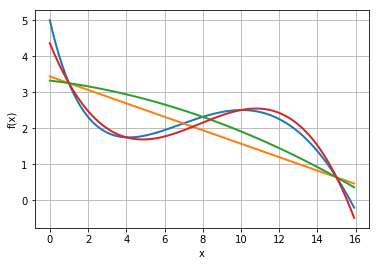

In [80]:
import math
import numpy as np
import matplotlib.pyplot as plt
 
from itertools import cycle
from functools import partial
from mpmath import mp
 
       
# mp.dps = 25
# mp.pretty = False
 
 
 
def f(x, ctx=math):
    return ctx.sin(x / 5) * ctx.exp(x / 10) + 5 * ctx.exp(-x / 2)
 
 
def approx_f(x, ws):
    return sum(x**i * w for i, w in enumerate(ws))
 
 
def a_matrix(xs, *, matrix=lambda x: x):
    return matrix([[x**n for n in range(len(xs))] for x in xs])
 
    
def b_matrix(xs, f, *, matrix=lambda x: x):
    return matrix([f(x) for x in xs])
 
 
def plot(fs, xlim, points=200):
    a, b = xlim
    colors = cycle(['b', 'r', 'g', 'm', 'k'])
    fig, ax = plt.subplots()
    xs = np.arange(a, b, (b-a)/points)
    for f, clr in zip(fs, colors):
        ys = [f(x) for x in xs]
        ax.plot(xs, ys, linewidth=2)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True)
    plt.show()
   
 
 
xpoints = [
    (1, 15),
    (1, 8, 15),
    (1, 4, 10, 15),
]
 
fs = [f]
for xs in xpoints:
    a = a_matrix(xs)
    b = b_matrix(xs, f)
    # ws = mp.lu_solve(a, b)
    # ws = scipy.linalg.solve(a, b)
    ws = np.linalg.solve(a,b)
    tf = partial(approx_f, ws=ws)
    fs.append(tf)
 
# mp.plot(fs, (0, 16))
plot(fs, (0, 16))